# 6.4: Supervised Machine Learning: Regression

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# generated graphs displayed automatically within the notebook

%matplotlib inline

In [3]:
# Creating path
path = r'C:\Users\ZenBook\Heart Attack Risk Prediction Dataset'

# Importing dataset
df = pd.read_csv(os.path.join(path,'02 Data Profile', 'heart_attack_prediction_dataset_cleaned.csv'))

## 2. Data cleaning

Hypothesis: Age is a probably primary driver of Heart Attack Risk, with older individuals showing significantly higher Heart Attack Risk. Since Heart Attack Risk is binary (0 and 1), standard linear regression isn’t suitable for analyzing its relationship with Age. Instead, I compare Age and Heart Rate, both numerical variables, to explore potential trends using regression analysis.

In [4]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Cholesterol Level', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family Heart Problems', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'Body Mass Index',
       'Triglyceride Levels', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [5]:
df.head(20)

,Patient ID,Age,Gender,Cholesterol Level,Blood Pressure,Heart Rate,Diabetes,Family Heart Problems,Smoking,Obesity,...,Sedentary Hours Per Day,Income,Body Mass Index,Triglyceride Levels,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


In [6]:
df.shape

(8763, 28)

In [6]:
# Check for missing values
df.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Cholesterol Level                  0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family Heart Problems              0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
Body Mass Index                    0
Triglyceride Levels                0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [7]:
# Check Duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicates found.

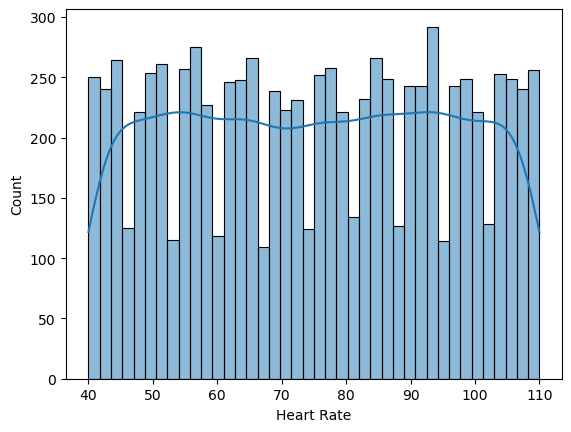

In [8]:
# check for extreme values in 'Heart Rate' column
sns.histplot(df['Heart Rate'], bins=40, kde=True)
plt.show()

In [9]:
# Check the average
df['Heart Rate'].mean()

np.float64(75.02168207234965)

In [10]:
# Check the meddian
df['Heart Rate'].median()

75.0

In [11]:
# Check the max
df['Heart Rate'].max()

110

## 3. Data prep for regression analysis

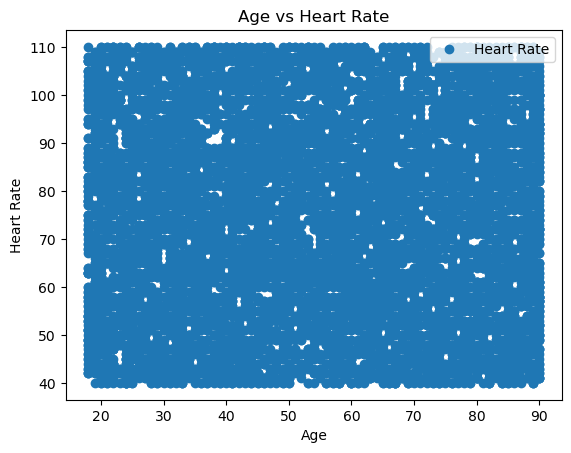

In [12]:
# Create a scatterplot (using matplotlib) - Age x Heart Rate variables plot against each other.

df.plot(x = 'Age', y='Heart Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs Heart Rate')  
plt.xlabel('Age')  
plt.ylabel('Heart Rate')  
plt.show()

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Age'].values.reshape(-1,1)
y = df['Heart Rate'].values.reshape(-1,1)

In [14]:
X

array([[67],
       [21],
       [21],
       ...,
       [47],
       [36],
       [25]])

In [15]:
y

array([[ 72],
       [ 98],
       [ 72],
       ...,
       [105],
       [ 60],
       [ 75]])

In [16]:
# Splitting data into a training and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [17]:
# Create a regression object

regression = LinearRegression()  # Obtaining regression object that will be fit onto the training set

In [18]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

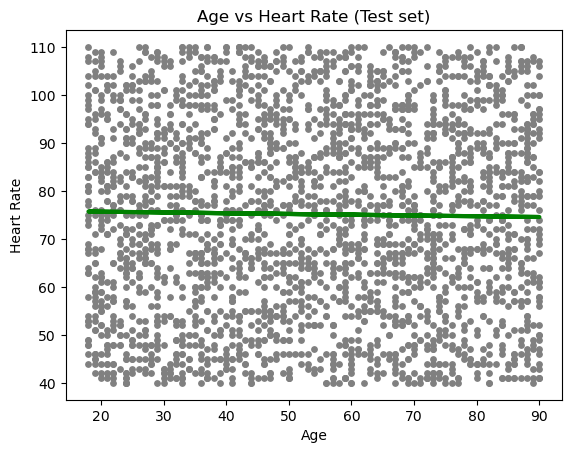

In [20]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='green', linewidth =3)
plot_test.title('Age vs Heart Rate (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Heart Rate')
plot_test.show()

In [21]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # the mean squared error
r2 = r2_score(y_test, y_predicted) # the r-squared value or R2 score 

In [22]:
# Print the model summary statistics to evaluate the performance of the model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01587185]]
Mean squared error:  415.047198157619
R2 score:  -0.001505587545475473


In [23]:
y_predicted

array([[75.470287  ],
       [75.10523444],
       [75.69249292],
       ...,
       [75.58138996],
       [74.93064408],
       [74.91477223]])

In [24]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30) #show  as a table

,Actual,Predicted
0,48,75.470287
1,46,75.105234
2,54,75.692493
3,53,75.200466
4,92,74.581463
5,45,74.978260
6,71,74.629079
7,81,74.644951
8,93,75.025875
9,56,75.549646


**Prediction Interpretation:** The noticeable difference between actual and predicted values highlights that the model struggles to capture the relationship between Age and Heart Rate. The relationship simply doesn’t follow a single, straight regression line.

Compare how the regression fits the training set

In [25]:
# Prediction

y_predicted_train = regression.predict(X_train) # predicting X_train

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01587185]]
Mean squared error:  425.50580647100054
R2 score:  0.0002661944725991239


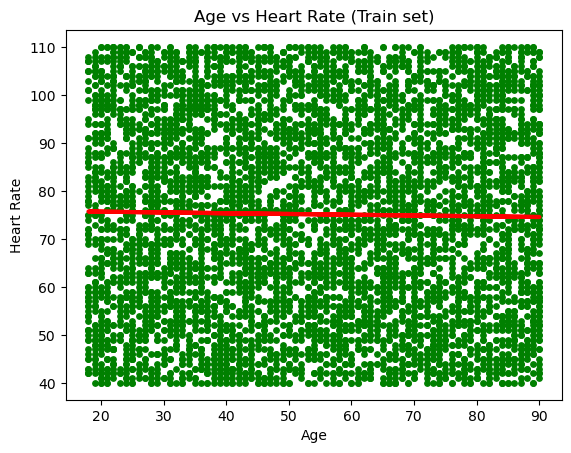

In [28]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs Heart Rate (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Heart Rate')
plot_test.show()

**General Interpretations:**
- Regression line doesn’t perfectly cover all of data points
- Slope ≈ -0.016 → Very weak negative relationship between Age and Heart rate: the older person - Heart Rate slightly drops (according analysed dataset)
- MSE ≈ 425.5 → High error, meaning predictions are far from actual values. Regression may not be the best model to represent this data and can’t accurately predict the influence of Age on the Heart Rate. 
- R2 score ≈ 0.0003 → Model fits the training set only slightly better than the test set ( R2_score_Test=-0.0015; R2_score_Train=0.00026). This means that we haven’t overfit the model.  However, model explains almost none of the variance in Heart Rate.
This suggests that Age is not a strong predictor of Heart Rate in the analysed dataset — at least not linearly.

**Possible Data Bias:**
1. Synthetic data may distort physiological patterns - synthetically generated values might not reflect real-world age-related changes in heart rate, leading to a weak or misleading slope.
2. Demographic imbalance can mask true trends - if age groups are not equally represented (e.g., too many young or seniour patients), the regression line may fail to capture meaningful variation across the full age spectrum.
3. Feature simplification reduces predictive power - Heart Rate may be influenced by multiple interacting factors (e.g., medication, stress, fitness, diet), and isolating Age without accounting for these can inflate error and suppress R2 score.
4. Noise and unclear feature definitions dilute signal - if Heart Rate measurements are noisy or inconsistently defined, the model may struggle to detect any real Age-related pattern, resulting in high MSE and low R2.
5. Simplified health indicators may mask nuanced influences - encoding complex health factors as binary variables (e.g., smoker vs. non-smoker - 1 or 0) can overlook the gradations in behavior or condition severity, reducing the model’s ability to account for subtle effects on Heart Rate or Heart Attack Risk in relation to Age.